# Project 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("data/train_LoanPredDataset.csv") 

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.shape

(614, 13)

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

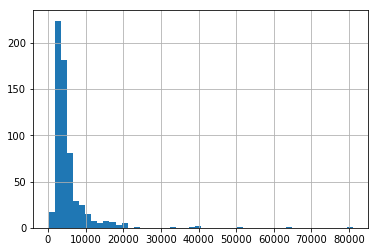

In [10]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50);

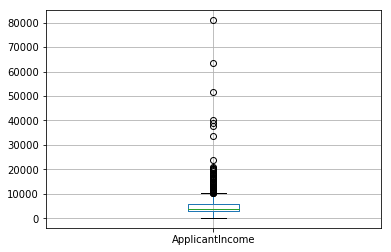

In [11]:
df.boxplot(column='ApplicantIncome');

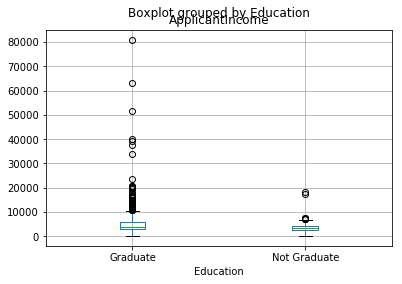

In [12]:
df.boxplot(column='ApplicantIncome', by = 'Education');

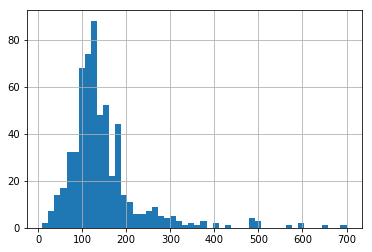

In [13]:
df['LoanAmount'].hist(bins=50);

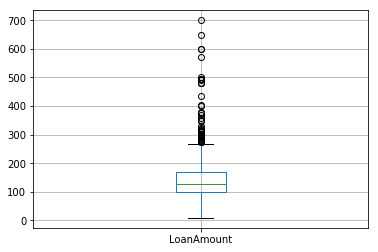

In [14]:
df.boxplot(column='LoanAmount');

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:')
print(temp1)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [16]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Probility of getting loan for each Credit History class:')
print(temp2)

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


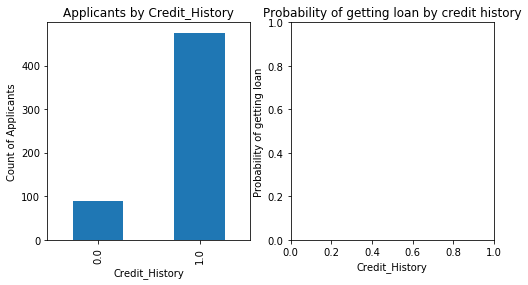

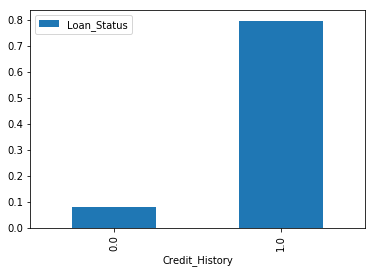

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121);
ax1.set_xlabel('Credit_History');
ax1.set_ylabel('Count of Applicants');
ax1.set_title("Applicants by Credit_History");
temp1.plot(kind='bar');

ax2 = fig.add_subplot(122);
temp2.plot(kind = 'bar');
ax2.set_xlabel('Credit_History');
ax2.set_ylabel('Probability of getting loan');
ax2.set_title("Probability of getting loan by credit history");

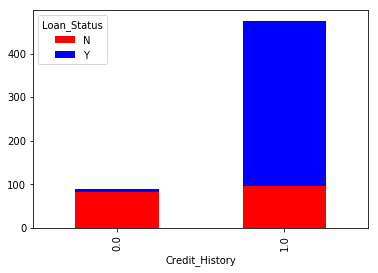

In [18]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, 
           color=['red','blue'], grid=False);

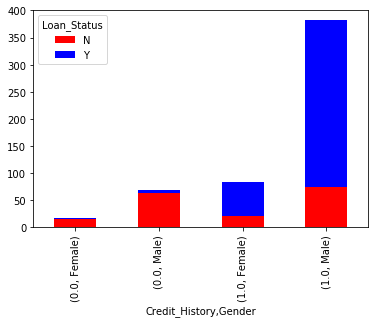

In [19]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, 
           color=['red','blue'], grid=False);

In [20]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

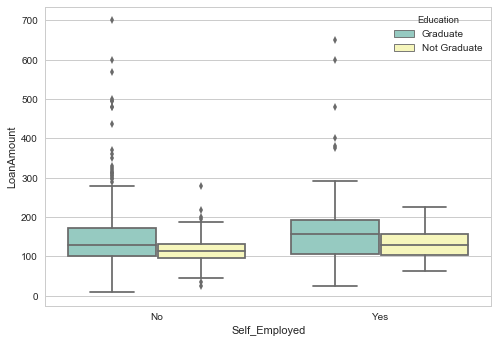

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="Self_Employed", y="LoanAmount", hue="Education",              
data=df, palette="Set3")

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df['Self_Employed'].fillna('No',inplace=True)

In [25]:
table = df.pivot_table(values='LoanAmount', 
index='Self_Employed' ,columns='Education', aggfunc=np.median)
table
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), 
                        inplace=True)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

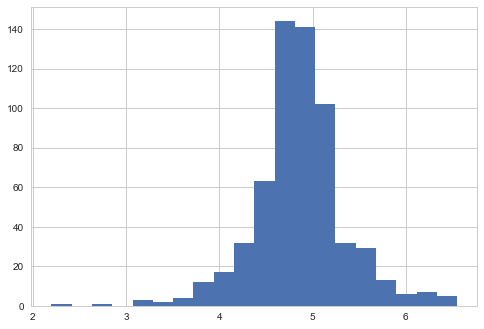

In [27]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

df['LoanAmount_log'].hist(bins=20);

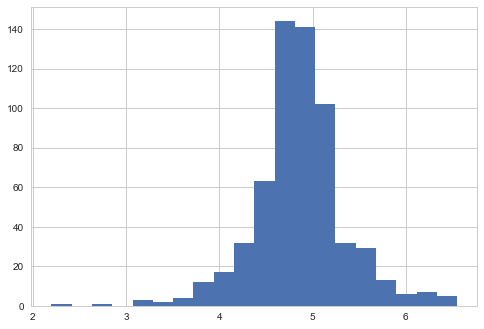

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20);

In [29]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [30]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [31]:
df['Gender'].fillna('Male',inplace=True)

In [32]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
df['Married'].fillna('Yes',inplace=True)

In [34]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [35]:
df['Dependents'].fillna('0',inplace=True)

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()
                              ,inplace=True)

In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [39]:
df['Credit_History'].fillna(1.0,inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and assessing performance
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
import random
random.seed(1)
model = DecisionTreeClassifier()
outcome_var = 'Loan_Status'
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 78.179%


In [44]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [45]:
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [66]:
df_test = pd.read_csv("data/test_LoanPredDataset.csv") 

df_test['Self_Employed'].fillna('No',inplace=True)
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), 
                        inplace=True)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])
df_test['Gender'].fillna('Male',inplace=True)
df_test['Married'].fillna('Yes',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean()
                              ,inplace=True)
df_test['Credit_History'].fillna(1.0,inplace=True)
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area', 'Loan_Status']
#df_test.Loan_Status
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [67]:
model = LogisticRegression()
predictor_var = ['Credit_History']
model.fit(df[predictor_var],df[outcome_var])
predictions = model.predict(df_test[predictor_var])
predictions
df_test.shape
#df_test.Loan_Status

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

(367, 16)

In [62]:
#Print test accuracy
test_accuracy = metrics.accuracy_score(predictions,df_test[outcome_var])
print("Test Data Accuracy : %s" % "{0:.3%}".format(test_accuracy))

Test Data Accuracy : 80.381%
